In [1]:
library(Biobase)
library(GenomicRanges)
data(sample.ExpressionSet, package = "Biobase")
se = makeSummarizedExperimentFromExpressionSet(sample.ExpressionSet)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To 

ERROR: Error in makeSummarizedExperimentFromExpressionSet(sample.ExpressionSet): não foi possível encontrar a função "makeSummarizedExperimentFromExpressionSet"


In [10]:
'''if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GenomicRanges")'''


Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'GenomicRanges'

also installing the dependencies ‘bitops’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘XVector’





The downloaded binary packages are in
	/var/folders/th/jqrslpcs3w10pjh4_sv2h3300000gn/T//RtmpxJ6qcF/downloaded_packages


installing the source package ‘GenomeInfoDbData’


Old packages: 'survival'



In [4]:
'''if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.11") ''''


The downloaded binary packages are in
	/var/folders/th/jqrslpcs3w10pjh4_sv2h3300000gn/T//RtmpxJ6qcF/downloaded_packages


Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'BiocVersion'




The downloaded binary packages are in
	/var/folders/th/jqrslpcs3w10pjh4_sv2h3300000gn/T//RtmpxJ6qcF/downloaded_packages


Old packages: 'survival'



In [12]:
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bottomly_eset.RData")
load(file=con)
close(con)
bot = bottomly.eset
pdata_bot=pData(bot)

con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)
bm = bodymap.eset
pdata_bm=pData(bm)

In [15]:
pdata_bm

,sample.id,num.tech.reps,tissue.type,gender,age,race
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>
ERS025098,ERS025098,2,adipose,F,73,caucasian
ERS025092,ERS025092,2,adrenal,M,60,caucasian
ERS025085,ERS025085,2,brain,F,77,caucasian
ERS025088,ERS025088,2,breast,F,29,caucasian
ERS025089,ERS025089,2,colon,F,68,caucasian
ERS025082,ERS025082,2,heart,M,77,caucasian
ERS025081,ERS025081,2,kidney,F,60,caucasian
ERS025096,ERS025096,2,liver,M,37,caucasian
ERS025099,ERS025099,2,lung,M,65,caucasian


In [88]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edge")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'edge'

also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’, ‘formatR’, ‘RSQLite’, ‘XML’, ‘xtable’, ‘lambda.r’, ‘futile.options’, ‘AnnotationDbi’, ‘annotate’, ‘futile.logger’, ‘snow’, ‘locfit’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘gtools’, ‘gmp’, ‘RcppArmadillo’, ‘plyr’, ‘genefilter’, ‘BiocParallel’, ‘matrixStats’, ‘edgeR’, ‘corpcor’, ‘lme4’, ‘ClusterR’, ‘lfa’, ‘irlba’, ‘rsvd’, ‘reshape2’, ‘sva’, ‘snm’, ‘jackstraw’, ‘qvalue’





The downloaded binary packages are in
	/var/folders/th/jqrslpcs3w10pjh4_sv2h3300000gn/T//Rtmpc7z38p/downloaded_packages


installing the source package ‘jackstraw’


Old packages: 'cpp11', 'ps', 'survival'



# QUIZ 2

In [89]:
library(datasets)
library(devtools)
library(broom)
library(Biobase)
library(limma)
library(edge)

In [16]:
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")
load(file=con)
close(con)
mp = montpick.eset
pdata=pData(mp)
edata=as.data.frame(exprs(mp))
fdata = fData(mp)

In [17]:
edata = edata[rowMeans(edata) > 100,]
dim(edata)

[1] 3072  129

In [18]:
#sem mudanças
svdd = svd(edata)

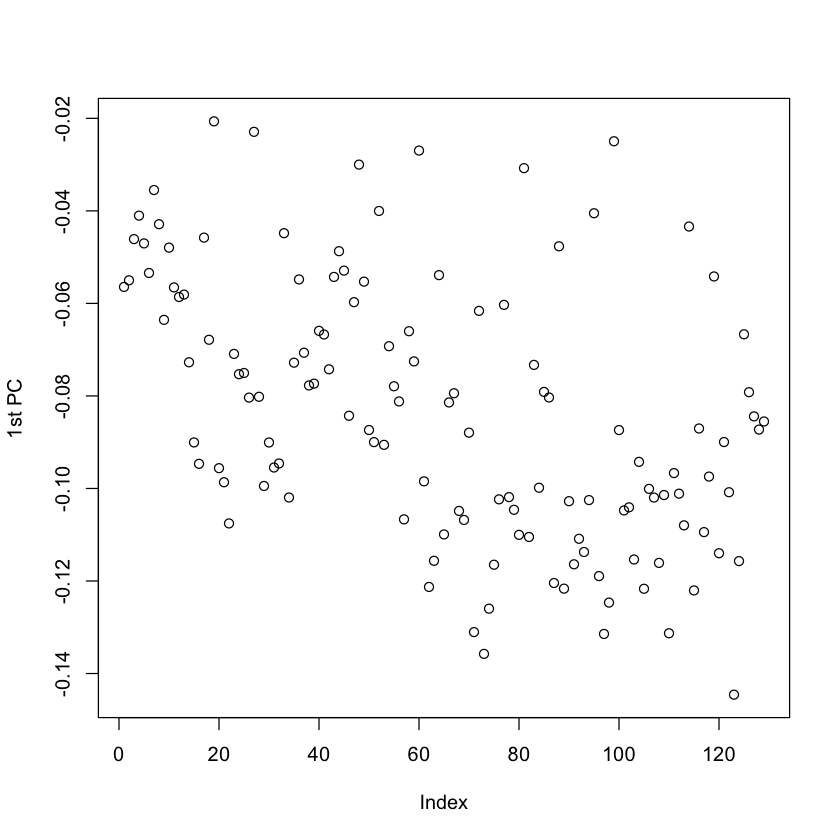

In [19]:
plot(svdd$v[,1], ylab = "1st PC")

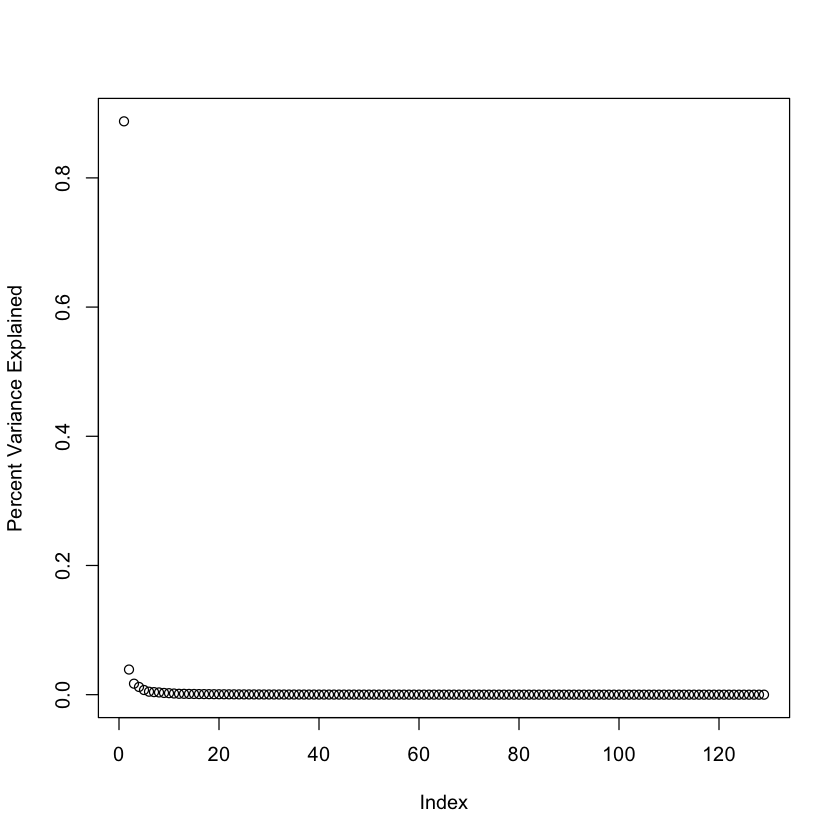

In [20]:
plot(svdd$d^2/sum(svdd$d^2), ylab = "Percent Variance Explained")

In [21]:
#without centering

In [56]:
edata1 = log2(edata + 1)

In [57]:
svd2 = svd(edata1)

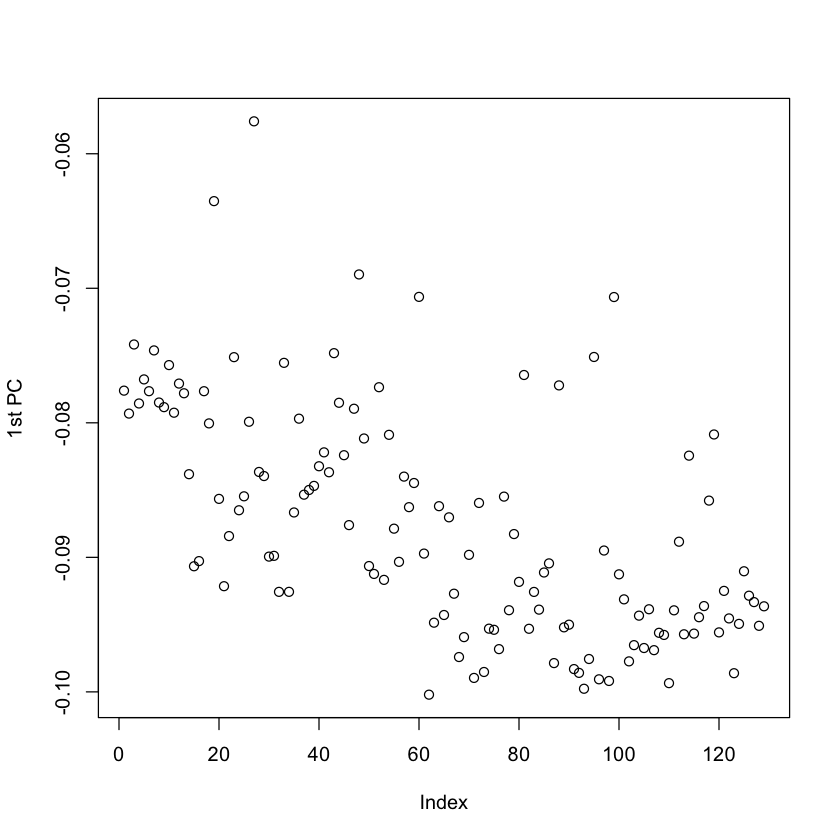

In [58]:
plot(svd2$v[,1], ylab = "1st PC")

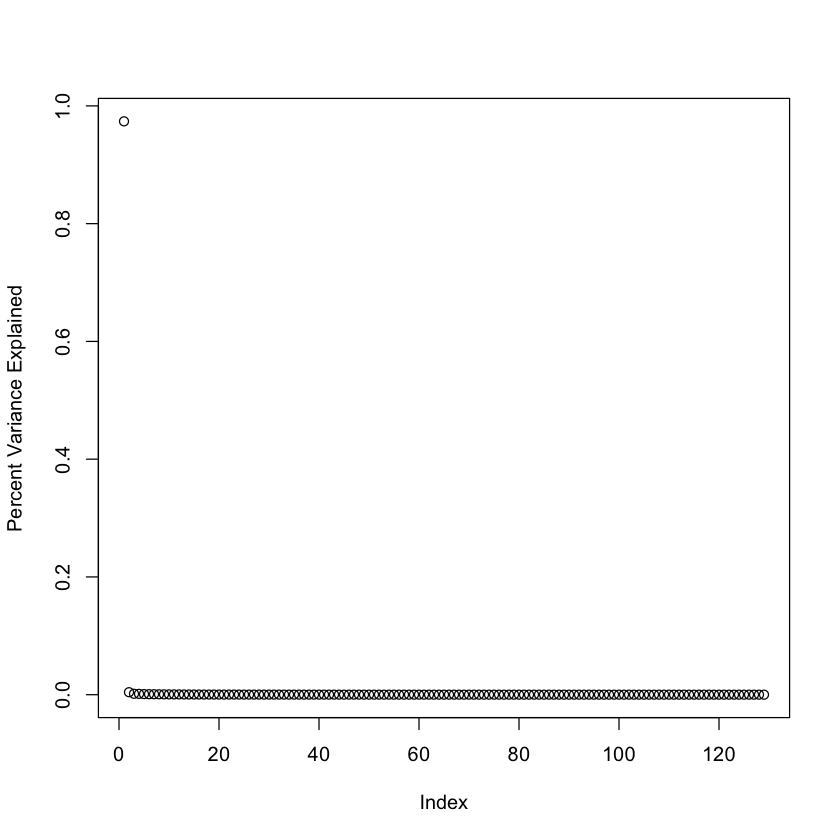

In [59]:
plot(svd2$d^2/sum(svd2$d^2), ylab = "Percent Variance Explained")

In [60]:
edata_centered = edata1 - rowMeans(edata1)

In [61]:
svd1 = svd(edata_centered)
names(svd1)

[1] "d" "u" "v"

In [62]:
svd1$d

[1] 6.810299e+02 2.642128e+02 2.428201e+02 2.274194e+02 1.880929e+02
  [6] 1.836654e+02 1.644897e+02 1.519001e+02 1.471812e+02 1.378751e+02
 [11] 1.354336e+02 1.227372e+02 1.183343e+02 1.163393e+02 1.079193e+02
 [16] 1.046846e+02 1.029210e+02 9.694277e+01 9.424650e+01 9.374665e+01
 [21] 9.144471e+01 9.039065e+01 9.006536e+01 8.825000e+01 8.716284e+01
 [26] 8.445072e+01 8.251149e+01 8.078506e+01 7.998867e+01 7.901079e+01
 [31] 7.845290e+01 7.699159e+01 7.689038e+01 7.621396e+01 7.424504e+01
 [36] 7.393748e+01 7.325233e+01 7.263435e+01 7.255864e+01 7.178504e+01
 [41] 7.087711e+01 7.016877e+01 6.956138e+01 6.858131e+01 6.795116e+01
 [46] 6.776859e+01 6.728827e+01 6.693636e+01 6.578613e+01 6.513639e+01
 [51] 6.486353e+01 6.459338e+01 6.430753e+01 6.389951e+01 6.376634e+01
 [56] 6.307640e+01 6.270129e+01 6.246173e+01 6.223275e+01 6.182486e+01
 [61] 6.120138e+01 6.114310e+01 6.087848e+01 6.075037e+01 6.026901e+01
 [66] 6.002122e+01 5.992126e+01 5.969435e+01 5.955695e+01 5.924091e+01
 [71] 5.902881e+01 5.874389e+01 5.855386e+01 5.846000e+01 5.811916e+01
 [76] 5.763099e+01 5.753049e+01 5.747613e+01 5.716955e+01 5.691640e+01
 [81] 5.679807e+01 5.641621e+01 5.625117e+01 5.596920e+01 5.590023e+01
 [86] 5.567507e+01 5.526833e+01 5.511153e+01 5.489938e+01 5.489030e+01
 [91] 5.425502e+01 5.409485e+01 5.404555e+01 5.375127e+01 5.355178e+01
 [96] 5.340211e+01 5.312602e+01 5.304096e+01 5.294815e+01 5.266139e+01
[101] 5.255189e+01 5.230318e+01 5.200823e+01 5.187966e+01 5.163049e+01
[106] 5.133850e+01 5.125636e+01 5.104298e+01 5.066960e+01 5.061549e+01
[111] 5.001010e+01 4.989261e+01 4.974463e+01 4.971814e+01 4.959978e+01
[116] 4.932253e+01 4.893663e+01 4.877207e+01 4.863393e+01 4.840406e+01
[121] 4.792300e+01 4.780252e+01 4.762721e+01 4.721495e+01 4.685002e+01
[126] 4.665365e+01 4.645944e+01 4.596869e+01 5.165353e-12

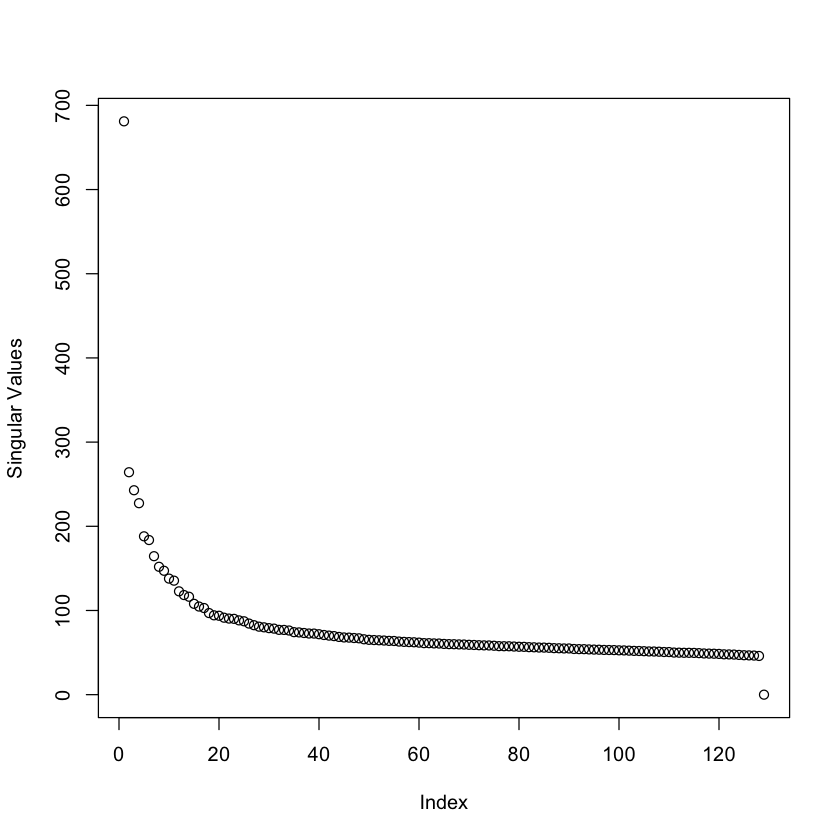

In [63]:
plot(svd1$d, ylab = "Singular Values")

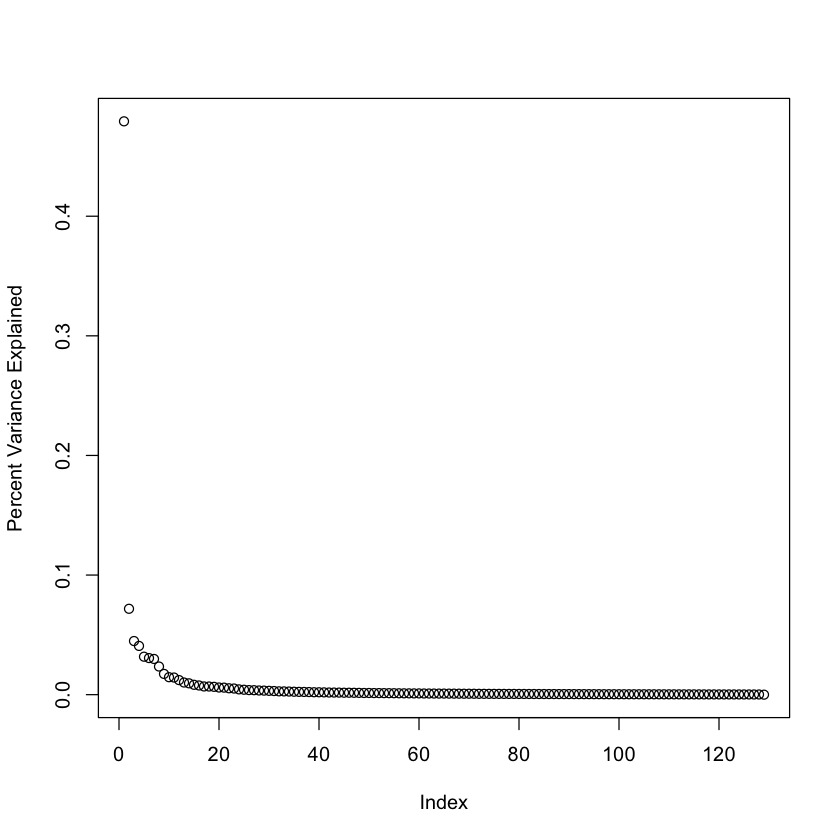

In [55]:
plot(svd1$d^2/sum(svd1$d^2), ylab = "Percent Variance Explained")

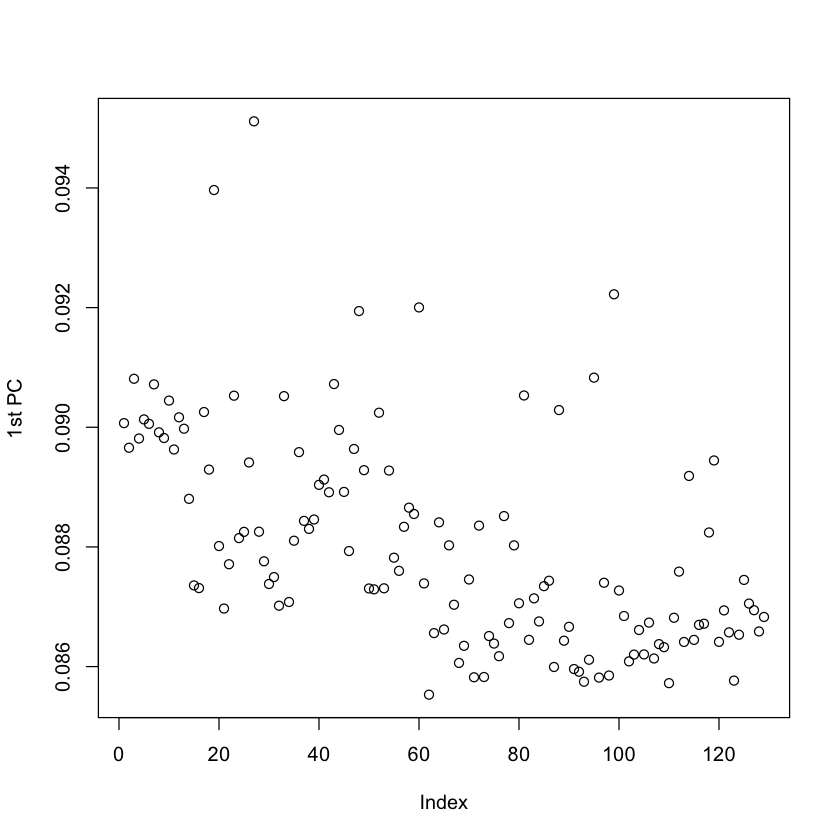

In [44]:
plot(svd1$v[,1], ylab = "1st PC")

In [45]:
set.seed(333)
kmeans1 = kmeans(edata_centered, centers = 2)

Warning message in matplot(kmeans1$centers):
“default 'pch' is smaller than number of columns and hence recycled”


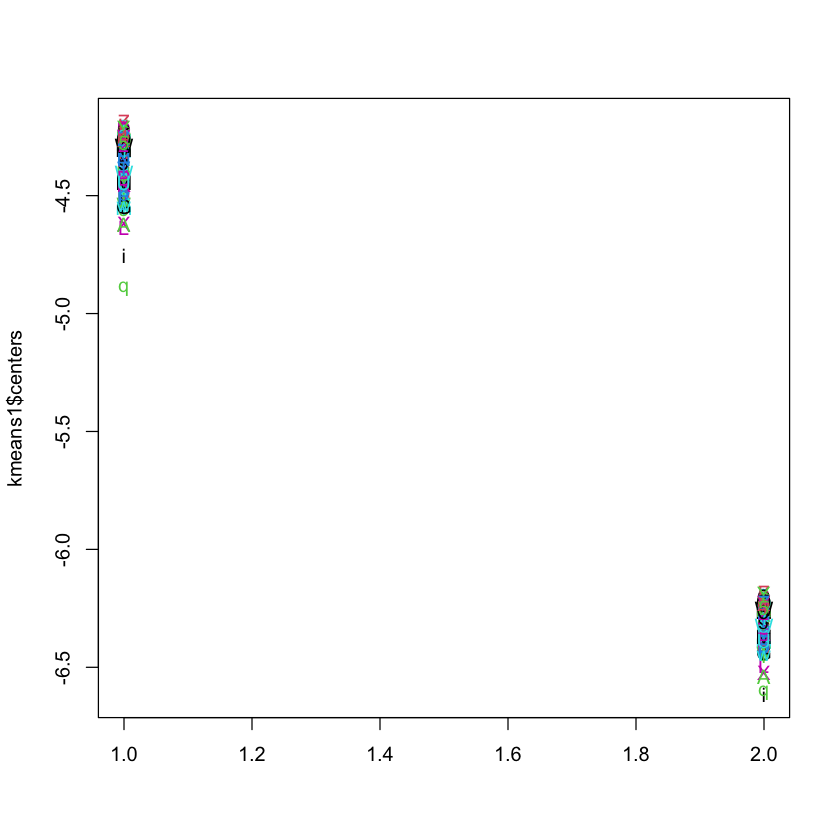

In [46]:
matplot(kmeans1$centers)

Quiz 2 do começo porque deu errado

In [64]:
con <- url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")
load(file=con)
close(con)
mp <-  montpick.eset
pdata <- pData(mp)
edata <- as.data.frame(exprs(mp))
fdata <- fData(mp)

In [65]:
svd_wt <- svd(edata)
max(svd_wt$d^2/sum(svd_wt$d^2))

[1] 0.8873421

In [66]:
log2.edata <- log2(edata + 1)
svd.l2 <- svd(log2.edata)
max(svd.l2$d^2/sum(svd.l2$d^2))

[1] 0.9737781

In [67]:
edata_centered = log2.edata - rowMeans(log2.edata)
svd.rlt = svd(edata_centered)
max(svd.rlt$d^2/sum(svd.rlt$d^2))

[1] 0.3463729

In [68]:
set.seed(333)
kmeans1 = kmeans(t(edata_centered),centers=2)
table(kmeans1$cluster)
cor(as.matrix(svd.rlt$v[,1]), as.matrix(kmeans1$cluster))


 1  2 
52 77 

-0.8678247


In [71]:
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)
bm = bodymap.eset
edata_bm = exprs(bm)
pdata_bm=pData(bm)

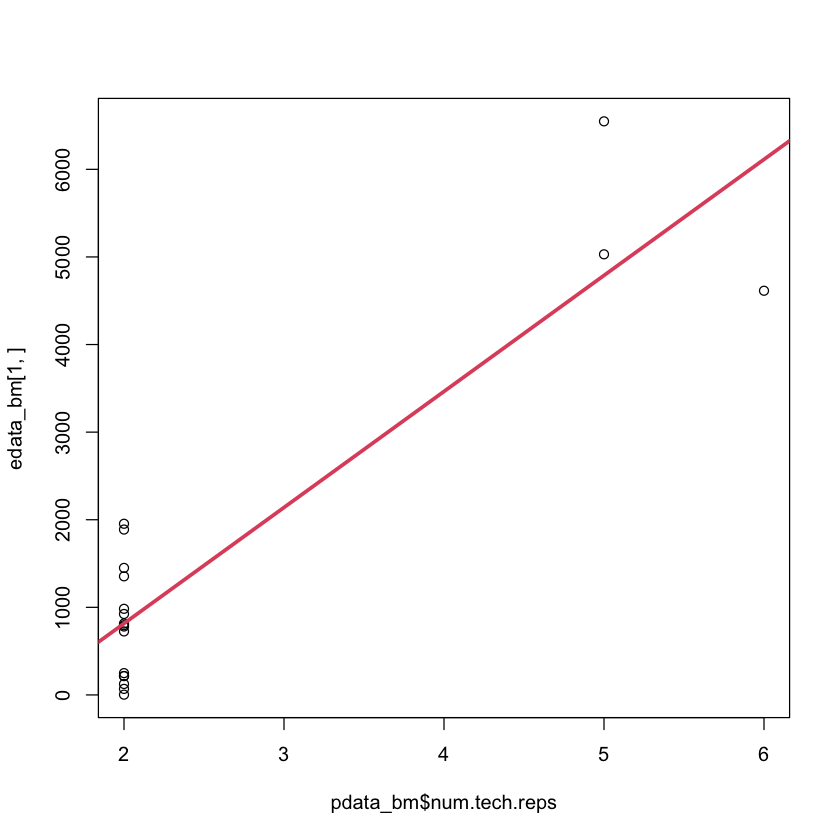

In [72]:
lm_bm.tech.repo = lm(edata_bm[1,] ~ pdata_bm$num.tech.reps)
plot(pdata_bm$num.tech.reps,edata_bm[1,], col=1)
abline(lm_bm.tech.repo$coeff[1],lm_bm.tech.repo$coeff[2], col=2,lwd=3)

In [73]:
lm_bm.age = lm(edata_bm[1,] ~ pdata_bm$age + pdata_bm$gender)
lm_bm.age$coefficients

(Intercept)     pdata_bm$age pdata_bm$genderM 
       2331.5814         -23.9133        -207.2565

In [74]:
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/montpick_eset.RData")
load(file=con)
close(con)
mp <- montpick.eset
pdata <- pData(mp)
edata <- as.data.frame(exprs(mp))
fdata <- fData(mp)

In [75]:
mod <- model.matrix(~ pdata$population)
fit <- lm.fit(mod,t(log2.edata))
dim(fit$coefficients)
dim(fit$effects)
dim(fit$residuals)

[1]     2 52580

[1]   129 52580

[1]   129 52580

In [90]:
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)
edata_bm = bodymap.eset
edata = exprs(bm)
pdata_bm=pData(bm)

An object of class "MArrayLM"
$coefficients
                (Intercept) pdata_bm.complete$age
ENSG00000000003   2187.9055            -23.249988
ENSG00000000005    580.9483             -6.961877
ENSG00000000419    862.2702             -2.723937
ENSG00000000457    562.6697             -2.346496
ENSG00000000460    207.4274             -2.585753
52575 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
  (Intercept) pdata_bm.complete$age
1       -4.00         -241.50000000
2        0.25           72.88175355
3        0.25           -0.19346406
4        0.25            0.46513700
5        0.25           -0.06997636
11 more rows ...

$qraux
[1] 1.25000 1.03979

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 14 14 14 14 14
52575 more elements ...

$sigma
ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
      465.73402       387.82998       226.48338       229.14613        70.01961 
52575 more elements ...

$cov.coefficients
                    

[1] 580.9483

ERROR: Error in fit$coefficients$pdata_bm.complete: $ operator is invalid for atomic vectors


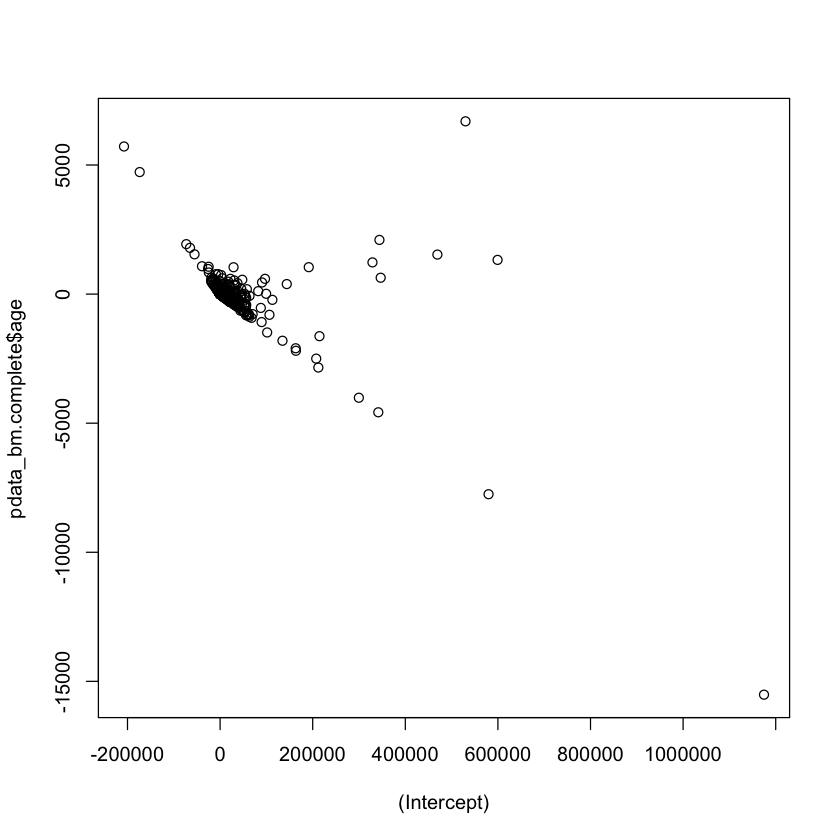

In [91]:
pdata_bm.complete <- na.omit(pdata_bm)
edata_bm.complete <- edata_bm[,c(rownames(pdata_bm.complete))]
model <- model.matrix(~ pdata_bm.complete$age)
fit <- lmFit(edata_bm.complete, model)
fit
fit$coefficients[2]
plot(fit$coefficients)
abline(fit$coefficients$pdata_bm.complete$age,lwd=3,col=1)
fit$coefficients[1000,]